## **Latar Belakang Masalah**

Seorang pimpinan Perusahaan dari PT Transjakarta ingin mengetahui bagaimana riwayat transportasi Transjakarta pada bulan April 2023. Informasi dari transportasi tersebut berbentuk dalam sebuah database yang berisikan sejumlah informasi didalamnya seperti data setiap pengguna Transjakarta, jam beserta tanggal setiap pengguna ketika melakukan perjalanan, dan lainnya. Oleh karena itu diperlukan sebuah analisa untuk mengetahui informasi apa sajakah yang bisa diambil dari database yang berisikan riwayat transportasi Transjakarta pada bulan April 2023 tersebut. Analisa tersebut bertujuan untuk mengetahui tren beserta insight yang dapat diambil dari database tersebut dengan harapan analisa tersebut dapat dijadikan rekomendasi beserta evaluasi bagi pimpinan Perusahaan untuk merumuskan program transportasi Transjakarta yang lebih nyaman di mata pengguna pada waktu yang akan mendatang.

Prosedur analisa pada database Transjakarta bulan April 2023 dapat diuraikan sebagai berikut.
1. Data Understanding
    - Mengetahui isi / informasi yang ada di dalam dataset sehingga kita dapat mengetahui informasi apa sajakah yang terkandung di dalam dataset tersebut
2. Merumuskan permasalahan
    - Rumusan masalah bertujuan untuk mengetahui permasalahan yang akan digali dalam sebuah analisa
3. Data Cleaning
    - Data Cleaning merupakan prosedur pembersihan terhadap noise yang dianggap dapat menganggu proses analisa ke depannya
    - Data Cleaning terdiri dari beberapa prosedur didalamnya yang meliputi
        - Handling Missing Value
        - Outlier Checking
        - Whitespace Checking and Handling
        - Data Formatting
4. Data Analysis
    - Data Analysis merupakan tahap untuk mengekstrak insight maupun tren yang dapat diambil dari database
    - Analisa pada dataset disesuaikan dengan rumusan masalah yang telah didefinisikan sebelumnya
    - Proses analisa dapat dibantu dengan menampilkan visualisasi (Bar Plot, Line Plot, Scatter Plot, dan lainnya)
    - Setiap analisa akan diberikan rekomendasi yang dapat dijadikan referensi bagi Perusahaan




## **Data Understanding**

| **Nama Kolom** | **Penjelasan**                                |
| ---------------- | -------------------------------------------------------- |
| TransID       | Kode unik setiap transaksi                 |
| payCardID     | Kode unik setiap kartu pembayaran pengguna                     |
| payCardBank   | Jenis transaksi pengguna                      |
| payCardName     | Nama pengguna dari setiap kartu pembayaran |
| payCardSex | Gender pengguna dari setiap kartu pembayaran             |
| direction      | Arah rute setiap pengguna ( 0 = pergi ; 1 = kembali)                  |
| tapInStops         | kode unik terminal tempat pengguna mulai berangkat                     |
| tapInStopsName       | Nama terminal tempat pengguna mulai berangkat                   |
| tapInStopsLat    | Koordinat latitude terminal tempat pengguna berangkat                |
| tapInStopsLon     | Koordinat longitude terminal tempat pengguna berangkat           |
| stopStartSeq  | urutan terminal tempat pengguna mulai berangkat dalam sebuah rute                 |
| tapInTime     | Waktu dalam bentuk tanggal beserta jam pengguna mulai berangkat                     |
| tapOutStops      | kode unik terminal tempat pengguna turun |
| tapOutStopsName      | Nama terminal tempat pengguna turun                               |
| tapOutStopsLat      | Koordinat latitude terminal tempat pengguna turun                        |
| tapOutStopsLon        | Koordinat longitude terminal tempat pengguna turun              |
| stopEndSeq     | urutan terminal tempat pengguna turun dalam sebuah rute             |
| tapOutTime     | Waktu dalam bentuk tanggal beserta jam pengguna turun               |
| payAmount       | Biaya yang harus dikeluarkan pengguna                         |

## **Rumusan Masalah**

Berikut adalah rumusan masalah yang dapat dibuat berdasarkan informasi yang Anda berikan:

1. **Korelasi Antara Variabel:**

    Tujuan dari analisis ini adalah untuk mengeksplorasi korelasi antara variabel-variabel seperti waktu perjalanan, biaya, jenis transaksi, dan lokasi penjemputan dengan variabel lainnya dalam data tersebut. Ini melibatkan analisis statistik untuk mengidentifikasi hubungan atau pola yang signifikan antara variabel-variabel tersebut, yang dapat memberikan wawasan tentang faktor-faktor yang memengaruhi penggunaan layanan transportasi.

2. **Pola Perilaku Pengguna Transportasi:**

    Analisis ini bertujuan untuk memahami bagaimana pengguna layanan transportasi Transjakarta berperilaku dalam menggunakan layanan tersebut. Ini mencakup identifikasi waktu dan lokasi yang paling umum untuk naik dan turun. Dengan memahami pola ini, dapat diketahui bagaimana pengguna memanfaatkan layanan transportasi tersebut dalam kehidupan sehari-hari mereka, dan dapat membantu dalam penyesuaian jadwal layanan untuk meningkatkan kenyamanan dan efisiensi.

3. **Profil Pengguna Kartu Pembayaran:**

    Tujuan dari analisis ini adalah untuk mengetahui profil pengguna kartu pembayaran yang digunakan dalam layanan transportasi Transjakarta. Ini mencakup identifikasi jenis kelamin pengguna dan preferensi mereka terhadap penggunaan kartu pembayaran, termasuk jumlah transaksi yang dilakukan, jenis transaksi yang paling umum, dan lainnya. Informasi ini dapat memberikan wawasan tentang demografi pengguna layanan dan pola penggunaan kartu yang mungkin memengaruhi kebijakan tarif dan promosi layanan.

4. **Analisis Biaya:**

    Tujuan dari analisis ini adalah untuk memahami distribusi biaya perjalanan pengguna layanan transportasi Transjakarta. Ini mencakup identifikasi seperti pola pengeluaran biaya untuk setiap kelompok gender. Informasi ini penting untuk evaluasi kebijakan tarif dan pemahaman tentang beban biaya yang ditanggung oleh pengguna layanan.


## **Load Dataset**

In [1]:
# Library untuk numpy dan dataframe
import numpy as np
import pandas as pd

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Uji statistik normalitas
from statsmodels.stats.diagnostic import lilliefors

# Uji statistik analisis
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest

# Warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [3]:
# Mengetahui tipe / format dari setiap data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## **Data Cleaning**

## **1. Menghapus whitespace dari data kategorik**

- Data kategorik terdiri dari:
    - payCardBank
    - payCardName
    - payCardSex
    - corridorID
    - corridorName
    - tapInStops
    - tapInStopsName
    - tapInTime
    - tapOutStops
    - tapOutStopsName
    - tapOutTime
    

In [4]:
df['payCardBank'] = df['payCardBank'].str.strip()

In [5]:
df['payCardName'] = df['payCardName'].str.strip()

In [6]:
df['payCardSex'] = df['payCardSex'].str.strip()

In [7]:
df['corridorID'] = df['corridorID'].str.strip()

In [8]:
df['corridorName'] = df['corridorName'].str.strip()

In [9]:
df['tapInStops'] = df['tapInStops'].str.strip()

In [10]:
df['tapInStopsName'] = df['tapInStopsName'].str.strip()

In [11]:
df['tapInTime'] = df['tapInTime'].str.strip()

In [12]:
df['tapOutStops'] = df['tapOutStops'].str.strip()

In [13]:
df['tapOutStopsName'] = df['tapOutStopsName'].str.strip()

In [14]:
df['tapOutTime'] = df['tapOutTime'].str.strip()

# **2. Handling missing value**

## **A. Mengetahui jumlah missing value dari setiap kolom / fitur**

In [15]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## **B. Handling missing value pada data numerik**

- Data numerik yang memiliki missing values terdiri dari:
    - tapOutStopsLat
    - tapOutStopsLon
    - stopEndSeq
    - payAmount
    - tapOutTime
- Handling missing value dilakukan dengan melihat persebaran data pada setiap kolom numerik. Jika distribusi data pada setiap kolom numerik berdistribusi normal maka handling missing value dapat dilakukan dengan mengisi nilai missing value dengan nilai mean
- Jika distribusi data pada setiap kolom numerik tidak berdistribusi normal maka handling missing value pada kolom numerik dapat dilakukan dengan mengisi nilai missing value dengan nilai median
- Adapun langkah untuk mengetahui apakah setiap data numerik berdistribusi normal dapat dilihat sebagai berikut
    - Kurtosis
        - Jika nilai kurtosis = 3, maka distribusi data dinyatakan normal secara kurtosis
        - kurtosis < 3, maka distribusi data tidak normal dan jenis kurtosis tersebut dinamakan platy kurtosis
        - kurtosis > 3, maka distribusi data tidak normal dan jenis kurtosis tersebut dinamakan lapto kurtosis
    - Skewness
        - Jika nilai skew = 0, maka distribusi data dinyatakan normal secara skew
        - Skew < 0, maka distribusi data tidak normal dan jenis skewness tersebut dinamakan left skew
        - Skew > 0, maka distribusi data tidak normal dan jenis skewness tersebut dinamakan right skew

**B.1 Handling missing value pada kolom tapOutStopsLat**

<Axes: xlabel='tapOutStopsLat', ylabel='Count'>

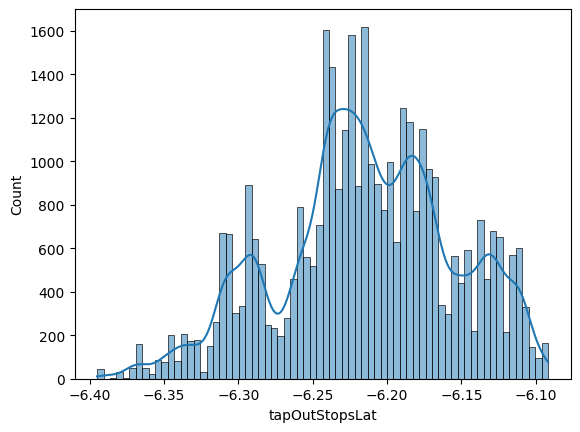

In [17]:
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='tapOutStopsLat', kde=True)

In [18]:
# Mengetahui distribusi data dengan nilai kurtosis
df['tapOutStopsLat'].kurtosis()

-0.3431328068797055

In [19]:
# Mengetahui distribusi data dengan nilai skew
df['tapOutStopsLat'].skew()

-0.22590932385496618

Insight
- Data pada kolom tapOutStopsLat tidak berdistribusi normal karena kurtosis bersifat platy kurtosis (kurtosis < 3) dan skewness bersifat left skew (skew <0)
- Maka handling missing value pada kolom tapOutStopsLat dapat dilakukan dengan mengisi nilai missing value dengan nilai median

In [20]:
# Mengisi missing value pada tapOutStopsLat dengan median
df['tapOutStopsLat'] = df['tapOutStopsLat'].fillna(value=df['tapOutStopsLat'].median())

**B.2 Handling missing value pada tapOutStopsLon**

<Axes: xlabel='tapOutStopsLon', ylabel='Count'>

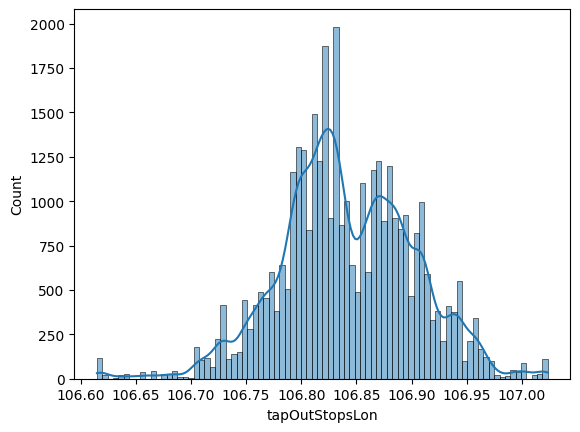

In [21]:
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='tapOutStopsLon', kde=True)

In [22]:
# Mengetahui distribusi data dengan nilai kurtosis
df['tapOutStopsLon'].kurtosis()

0.45242034433584255

In [23]:
# Mengetahui distribusi data dengan nilai skew
df['tapOutStopsLon'].skew()

-0.09632678898778703

Insight
- Data pada kolom tapOutStopsLon tidak berdistribusi normal karena kurtosis bersifat platy kurtosis (kurtosis < 3) dan skewness bersifat left skew (skew <0)
- Maka handling missing value pada kolom tapOutStopsLon dapat dilakukan dengan mengisi nilai missing value dengan nilai median

In [24]:
# Mengisi missing value pada tapOutStopsLon dengan median
df['tapOutStopsLon'] = df['tapOutStopsLon'].fillna(value=df['tapOutStopsLon'].median())

**B.3 Handling missing value pada stopEndSeq**

<Axes: xlabel='stopEndSeq', ylabel='Count'>

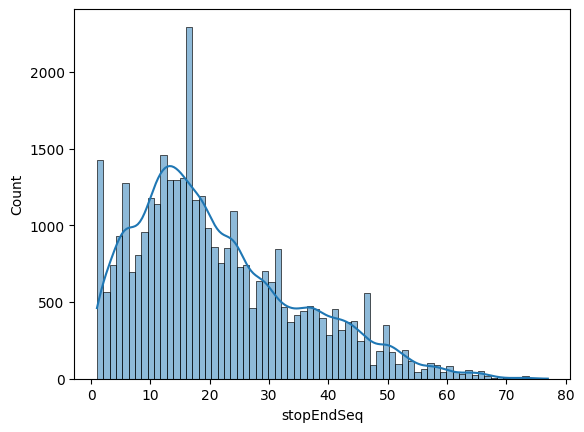

In [25]:
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='stopEndSeq', kde=True)

In [26]:
# Mengetahui distribusi data dengan nilai kurtosis
df['stopEndSeq'].kurtosis()

0.14306451257724184

In [27]:
# Mengetahui distribusi data dengan nilai skew
df['stopEndSeq'].skew()

0.8153845675869085

Insight
- Data pada kolom stopEndSeq tidak berdistribusi normal karena kurtosis bersifat platy kurtosis (kurtosis < 3) dan skewness bersifat right skew (skew >0)
- Maka handling missing value pada kolom stopEndSeq dapat dilakukan dengan mengisi nilai missing value dengan nilai median

In [28]:
# Mengisi missing value pada stopEndSeq dengan median
df['stopEndSeq'] = df['stopEndSeq'].fillna(value=df['stopEndSeq'].median())

**B.4 Handling missing value pada payAmount**

<Axes: xlabel='payAmount', ylabel='Count'>

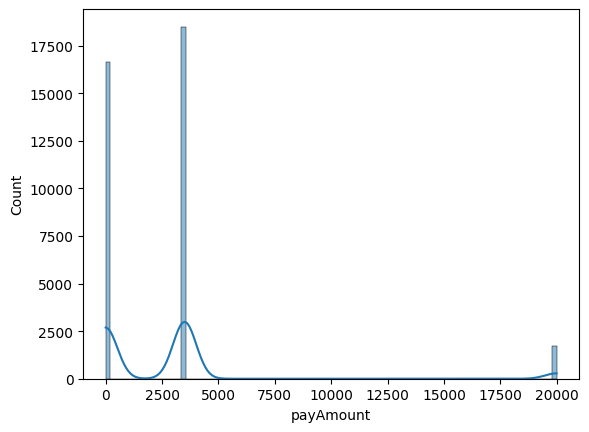

In [29]:
# Mengetahui distribusi data dengan visualisasi histogram
sns.histplot(data=df, x='payAmount', kde=True)

In [30]:
# Mengetahui distribusi data dengan nilai kurtosis
df['payAmount'].kurtosis()

10.51514840247649

In [31]:
# Mengetahui distribusi data dengan nilai skew
df['payAmount'].skew()

3.156257811008617

Insight
- Data pada kolom payAmount tidak berdistribusi normal karena kurtosis bersifat lapto kurtosis (kurtosis > 3) dan skewness bersifat right skew (skew > 0)
- Maka handling missing value pada kolom payAmount dapat dilakukan dengan mengisi nilai missing value dengan nilai median

In [32]:
# Mengisi missing value pada payAmount dengan median
df['payAmount'] = df['payAmount'].fillna(value=df['payAmount'].median())

**Memastikan tidak ada nilai missing value pada kolom numerik**

In [33]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

## **C. Melakukan handling missing value pada kolom kategorik**

- Data kategorik yang memiliki missing values terdiri dari:
    - corridorID
    - corridorName
    - tapInStops
    - tapOutStops
    - tapOutStopsName
- Data kategorik merupakan data yang berbentuk string / object, maka handling missing value dapat dilakukan dengan mengisi nilai missing value dengan item yang berbentuk string / object juga
- Adapun jenis item string / object yang dapat dijadikan referensi untuk melakukan handling missing value pada data kategorik dapat diuraikan sebagai berikut
    - Modus

In [34]:
df['corridorID'] = df['corridorID'].fillna(value=df['corridorID'].mode()[0])

In [35]:
df['corridorName'] = df['corridorName'].fillna(value=df['corridorName'].mode()[0])

In [36]:
df['tapInStops'] = df['tapInStops'].fillna(value=df['tapInStops'].mode()[0])

In [37]:
df['tapOutStops'] = df['tapOutStops'].fillna(value=df['tapOutStops'].mode()[0])

In [38]:
df['tapOutStopsName'] = df['tapOutStopsName'].fillna(value=df['tapOutStopsName'].mode()[0])

**Memastikan tidak ada nilai missing value pada kolom kategorik**

In [39]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        37900 non-null  object 
 7   corridorName      37900 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        37900 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       37900 non-null  object 
 16  tapOutStopsName   37900 non-null  object

In [41]:
df[['tapOutTime']]

,tapOutTime
0,2023-04-03 06:00:53
1,2023-04-03 06:40:01
2,2023-04-03 06:50:55
3,2023-04-03 06:28:16
4,2023-04-03 06:57:03
...,...
37895,2023-04-21 19:55:49
37896,2023-04-18 22:28:22
37897,2023-04-04 13:27:25
37898,2023-04-15 20:27:50


Insight
- Terdapat missing value pada satu kolom tersisa, yaitu kolom tapOutTime. Kolom tersebut berisikan data yang bersifat waktu namun secara format, tipe data pada kolom tersebut bertipe object / kategorik
- Maka kita dapat melakukan pengubahan tipe data pada kolom tapOutTime tersebut dari object menjadi datetime agar dapat melakukan handling missing value yang sesuai

# **4. Data Formatting**

- Data formatting merupakan salah satu bagian dari data cleaning yang bertujuan untuk mengubah tipe dari setiap kolom menjadi tipe yang sesuai
- Kolom yang akan dilakukan perubahan pada format terdiri dari:
    - tapOutTime
    - tapInTime
    - payCardID

**Data formatting pada kolom tapOutTime dan tapOutTime**
- Kolom tapOutTime dan tapOutTime merupakan kolom yang memiliki tipe object / data kategorik
- Sedangkan isi data dari kedua kolom tersebut merupakan data yang bersifat waktu (tanggal, bulan, tahun, dan jam), maka kita dapat mengubah tipe kedua kolom tersebut dari object menjadi tipe datetime

In [42]:
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

- Jika kita kembali pada pembahasan mengenai missing value sebelumnya maka kolom tapOutTime merupakan kolom tersisa yang masih memiliki missing value. Oleh karena kolom tapOutTime merupakan data yang telah diubah tipe nya menjadi bentuk datetime maka handling missing value pada kolom tersebut tidak dapat dilakukan dengan mengisi menggunakan nilai mean dan median layaknya handling missing value pada kolom yang bertipe numerik
- Maka kita dapat memutuskan untuk melakukan drop pada keseluruhan missing value dari kolom tapOutTime tersebut. Alasan melakukan drop missing value pada kolom tersebut dikarenakan jumlah baris missing value sebesar kurang dari 10 persen dari keseluruhan jumlah baris data sebesar 37900 baris

In [43]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1344
payAmount              0
dtype: int64

In [44]:
df.shape

(37900, 22)

In [45]:
df.dropna(subset=['tapOutTime'], inplace=True)

In [46]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

**Data formatting pada kolom payCardID**
- Tipe data dari kolom payCardID dan payCardBirthDate merupakan tipe yang berbentuk numerik
- Kita akan melakukan pengubahan tipe data dari kedua kolom tersebut menjadi tipe object / kategorik. Pengubahan ke tipe object tersebut bertujuan agar kedua kolom tersebut tidak diikutsertakan dalam proses statistik
- Alasan mengapa kedua kolom tersebut tidak diikutkan dalam proses statistik dikarenakan kedua kolom tersebut merupakan kolom yang bersifat primary key

In [47]:
df['payCardID'] = pd.to_numeric(df['payCardID']).astype(object)

In [48]:
df['payCardBirthDate'] = pd.to_numeric(df['payCardBirthDate']).astype(object)

# **5. Outlier**

- Outlier merupakan data yang memiliki jarak terjauh dari kumpulan persebaran data pada setiap kolom numerik
- Outlier yang ditemukan pada setiap kolom dapat dilakukan handling maupun tidak bergantung dari tujuan analisis
- Dalam penelitian ini, kita memutuskan untuk tidak melakukan handling pada outliers dengan tujuan agar tidak menghilangkan informasi / data dari setiap kolom numerik sehingga akan memperlancar proses analisis selanjutnya

**Menampilkan boxplot pada setiap kolom numerik untuk melihat outliers**

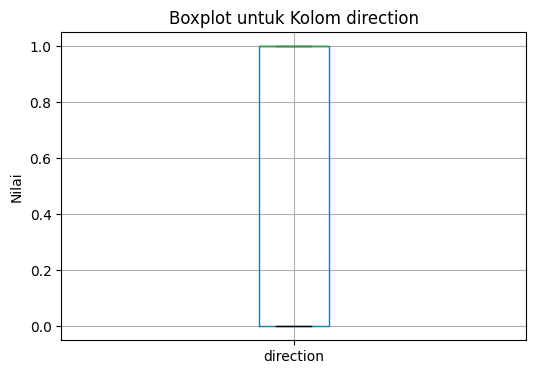

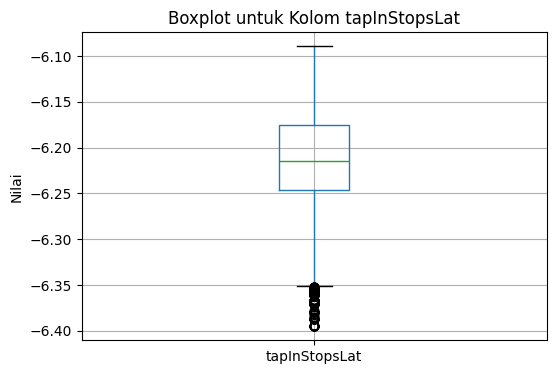

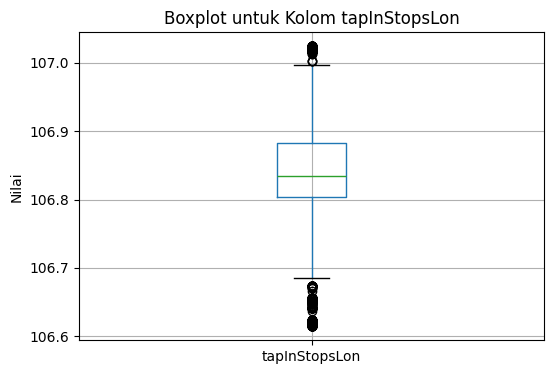

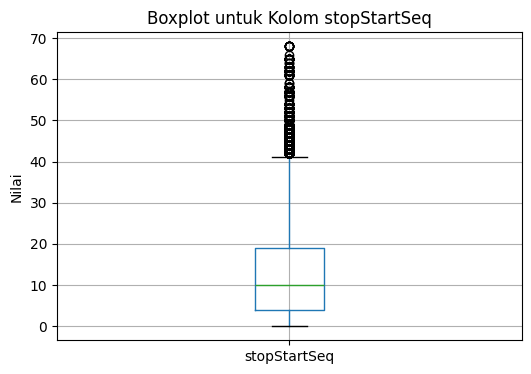

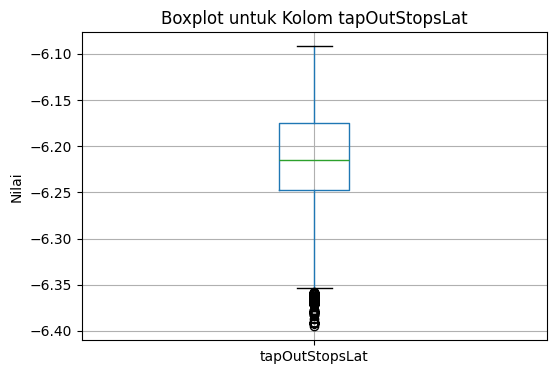

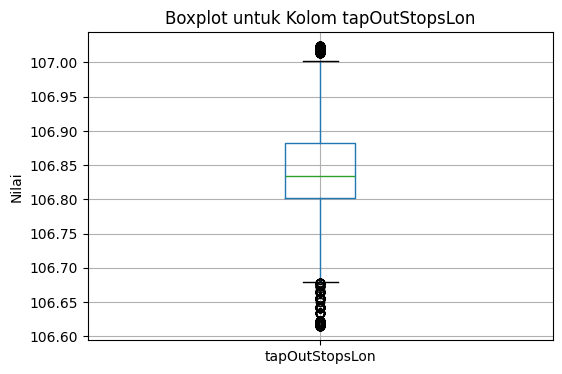

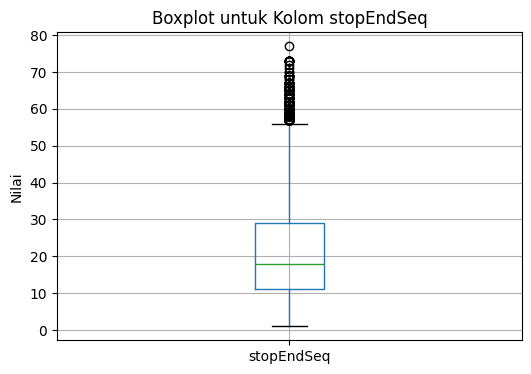

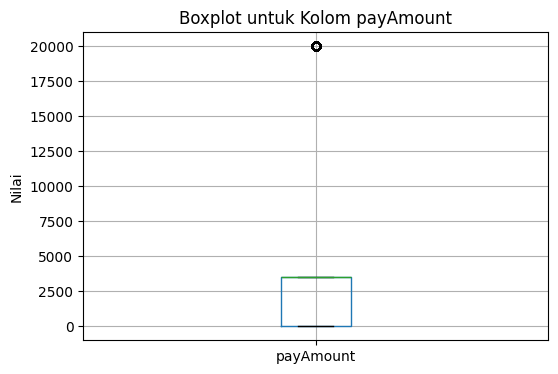

In [49]:
# library
import matplotlib.pyplot as plt

# Memilih kolom numerik dalam DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Menampilkan boxplot untuk setiap kolom numerik secara terpisah
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=column)
    plt.title('Boxplot untuk Kolom {}'.format(column))
    plt.ylabel('Nilai')
    plt.grid(True)
    plt.show()


# **6. Cek Data Duplikat**

- Melakukan handling pada data yang bersifat duplikat bertujuan agar tidak terjadi informasi yang bersifat ganda

**Mengetahui jumlah baris yang bersifat duplikat pada dataset**

In [50]:
df.duplicated().sum()

0

# **Analisis Data**

## **1. Mengetahui Korelasi antar Variabel**

**Definisi korelasi**
- Korelasi merupakan sebuah definisi yang merujuk pada seberapa kuat hubungan antar variabel / fitur dalam dataset
- Korelasi hanya berlaku untuk variabel yang bersifat numerik
- Korelasi dapat dilihat hanya berdasarkan dua variabel (Tidak bisa melebihi maupun kurang dari dua variabel)
- Korelasi diukur berdasarkan angka dalam rentang -1 hingga 1 dengan ketentuan sebagai berikut:
    - Nilai korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang sangat kuat antar kedua data variabel
    - Nilai korelasi yang mendekati 0 menunjukkan hubungan yang lemah antar kedua variabel
    - Nilai korelasi positif menunjukkan hubungan searah antar dua variabel. Seperti contoh jika nilai dari variabel X1 semakin tinggi maka nilai variabel X2 juga akan semakin tinggi
    - Nilai korelasi negatif menunjukkan hubungan secara berlawanan antar dua variabel. Seperti contoh jika nilai dari variabel X1 semakin tinggi maka nilai variabel X2 akan semakin rendah
- Pengkategorian kuat atau lemahnya berdasarkan rentang nilai korelasi dapat diuraikan sebagai berikut:
    - Rentang 0 - 0.19 (Korelasi sangat lemah)
    - Rentang 0.2 - 0.39 (Korelasi lemah)
    - Rentang 0.4 - 0.59 (Korelasi sedang)
    - Rentang 0.6 - 0.79 (Korelasi kuat)
    - Rentang 0.8 - 1 (Korelasi sangat kuat)
- Analisis korelasi pada data Transjakarta bulan April 2023 bertujuan untuk mengetahui apakah setiap informasi transportasi Transjakarta memiliki hubungan dengan informasi lainnya dalam dataset
    

**Mengetahui korelasi antar variabel numerik**

In [51]:
# Melihat tabel nilai korelasi antar data numerik
df.corr(numeric_only=True)

,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
direction,1.000000,0.002087,-0.008807,-0.052064,-0.058007,0.045972,-0.044204,0.000891
tapInStopsLat,0.002087,1.000000,0.024730,-0.002537,0.899224,0.033296,-0.012108,-0.123002
tapInStopsLon,-0.008807,0.024730,1.000000,0.041426,0.035634,0.892529,0.080392,-0.190589
stopStartSeq,-0.052064,-0.002537,0.041426,1.000000,-0.017807,0.037464,0.825642,-0.250049
tapOutStopsLat,-0.058007,0.899224,0.035634,-0.017807,1.000000,0.016244,-0.025369,-0.141093
tapOutStopsLon,0.045972,0.033296,0.892529,0.037464,0.016244,1.000000,0.073888,-0.192249
stopEndSeq,-0.044204,-0.012108,0.080392,0.825642,-0.025369,0.073888,1.000000,-0.323963
payAmount,0.000891,-0.123002,-0.190589,-0.250049,-0.141093,-0.192249,-0.323963,1.000000


In [52]:
# np.triu merupakan function untuk memotong heatmap dengan bentuk segitiga bawah
matrix = np.triu(df.corr(numeric_only=True))

Text(0.5, 1.0, 'Correlation of Numeric Values')

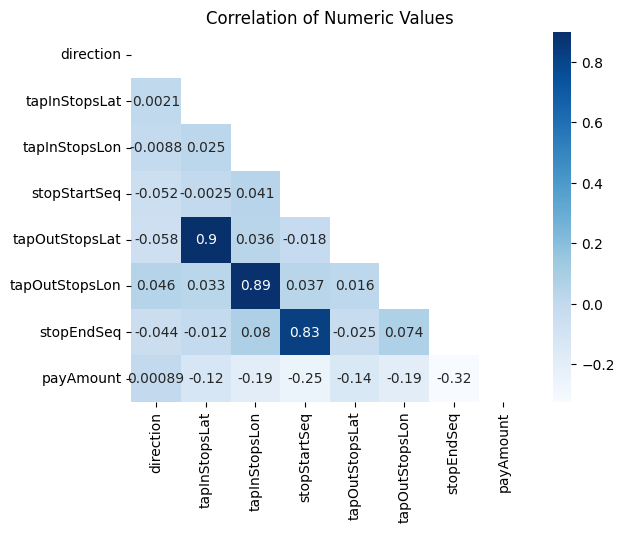

In [53]:
# Melihat heatmap dari semua kolom numerik
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap='Blues',
            mask=matrix
            )

plt.title('Correlation of Numeric Values')

**Insight korelasi**
- Berdasarkan tabel maupun heatmap korelasi dari seluruh variabel numerik dalam dataset maka hampir secara keseluruhan nilai korelasi antar dua variabel numerik menunjukkan angka yang berada di rentang 0 hingga 0.1. Maka dapat diinterpretasikan bahwa nilai korelasi antar kedua variabel numerik yang memiliki nilai dalam rentang tersebut menunjukkan tidak terdapat hubungan yang kuat antar setiap informasi dari transportasi Transjakarta terhadap informasi lainnya
- Nilai korelasi antar kedua variabel yang sama akan selalu menunjukkan angka 1 karena kedua informasi merupakan informasi yang sama untuk kita lihat nilai korelasinya
- Namun terdapat 3 nilai korelasi yang menunjukkan hubungan yang cukup kuat antar kedua variabel. Hal tersebut dapat dilihat dari nilai korelasi yang berada pada rentang diatas 0.8. Adapun ketiga nilai korelasi tersebut dapat ditunjukkan oleh kedua variabel dengan penjelasan sebagai berikut:
    - tapOutStopsLat dengan tapInStopsLat (Nilai korelasi = 0.9)
        - Nilai korelasi antar kedua variabel tersebut merupakan nilai korelasi tertinggi dalam dataset
        - Terdapat beberapa analisa yang dapat saya ambil dari korelasi tersebut antara lain, yaitu dengan adanya hubungan yang kuat antar kedua variabel tersebut maka dapat diambil analisa bahwa setiap pengguna yang sedang naik pada sebuah terminal cenderung akan turun pada terminal yang berdekatan
        - Nilai tapOutStopsLat dan tapInStopsLat merupakan variabel yang menunjukkan angka geografis dari setiap terminal yang dilalui oleh pengguna Transjakarta. Korelasi yang kuat antar kedua variabel tersebut dapat menunjukkan bahwa secara geografis juga terminal satu dengan terminal lainnya memiliki jarak yang relatif berdekatan satu sama lain
        - Korelasi yang kuat antar kedua variabel tersebut dapat menunjukkan sebuah pola perjalanan yang konsisten dari setiap pengguna Transjakarta. Seperti contoh, setiap pengguna ketika sedang naik pada sebuah terminal cenderung akan turun di terminal yang sama setiap kali melakukan perjalanan
    - tapOutStopsLon dengan tapInStopsLon (Nilai korelasi = 0.89)
        - Analisis pada kedua variabel tersebut sama hal nya seperti analisis yang dilakukan pada kedua variabel sebelumnya yaitu tapOutStopsLat dengan tapInStopsLat namun hanya memiliki perbedaan dalam hal pengertian / data understanding antara longitude dengan latitude pada pengguna yang melakukan perjalanan naik (tap in) dan perjalanan turun (tap out)
        - Longitude merupakan koordinat yang menunjukkan lokasi sebuah titik yang berada di sebelah timur atau barat dari Prime Meridian (garis bujur nol)
        - Sedangkan latitude merupakan koordinat yang berada di sebelah utara atau selatan dari Equator
    - stopEndSeq dengan stopStartSeq (Nilai korelasi = 0.83)
        - Analisis pada korelasi antar variabel stopEndSeq dengan stopStartSeq memiliki interpretasi yang serupa dengan interpretasi sebelumnya. Namun yang berbeda adalah analisis korelasi antar kedua variabel tersebut merupakan analisis untuk melihat seberapa kuat hubungan dari setiap informasi pengguna berupa urutan pemberangkatan dan pemberhentian yang dilalui oleh setiap pengguna


**Mengetahui korelasi antar variabel kategorik**

- Perhitungan korelasi pada variabel kategorik dapat diukur melalui uji Chi-Square
- Interpretasi dari Chi-Square dapat dibentuk berdasarkan pernyataan hipotesis yang dibentuk untuk kemudian hipotesis yang akan menjadi kesimpulan dari uji Chi-Square ditentukan melalui nilai pvalue
- Adapun ketentuan untuk menjawab hipotesis berdasarkan uji Chi Square dapat diuraikan sebagai berikut:
    - H0: Kedua variabel kategorik tidak memiliki keterkaitan satu sama lain
    - H1: Kedua variabel kategorik memiliki keterkaitan satu sama lain
    - Jika nilai pvalue < 0.05 maka interpretasi nya adalah menolak pernyataan dari hipotesis H0. Sedangkan jika nilai pvalue melebihi 0.05 maka interpretasi yang akan diuraikan adalah menerima pernyataan hipotesis dari H0

**Mengetahui keterkaitan antara variabel payCardSex (gender pengguna) dengan tapInStopsName (nama terminal pemberangkatan dari setiap pengguna) dan tapOutStopsName (nama terminal pemberhentian dari setiap pengguna)**

Uji Chi Square untuk mengetahui keterkaitan antara payCardSex dengan tapInStopsName

- Pernyataan Hipotesis keterkaitan antar payCardSex dengan tapInStopsName
    - H0 : Variabel payCardSex tidak memiliki keterkaitan dengan tapInStopsName
    - H1 : Variabel payCardSex memiliki keterkaitan dengan tapInStopsName

In [54]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [55]:
# Import library
from scipy.stats import chi2_contingency

In [56]:
# Hitung tabel kontingensi
contingency_table = pd.crosstab(df['payCardSex'], df['tapInStopsName'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 23715.959942765912
P-value: 0.0


In [57]:
# conclusion
if p >= 0.05:
    # Ho
    print(f'''pvalue = {p}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya tidak berbeda signifikan)''')
else:
    # Ha
    print(f'''pvalue = {p}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya berbeda signifikan)''')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya berbeda signifikan)


Uji Chi Square untuk mengetahui keterkaitan antara payCardSex dengan tapOutStopsName

- Pernyataan Hipotesis keterkaitan antar payCardSex dengan tapOutStopsName
    - H0 : Variabel payCardSex tidak memiliki keterkaitan dengan tapOutStopsName
    - H1 : Variabel payCardSex memiliki keterkaitan dengan tapOutStopsName

In [58]:
# Hitung tabel kontingensi
contingency_table = pd.crosstab(df['payCardSex'], df['tapOutStopsName'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 22403.810406386983
P-value: 0.0


In [59]:
# conclusion
if p >= 0.05:
    # Ho
    print(f'''pvalue = {p}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya tidak berbeda signifikan)''')
else:
    # Ha
    print(f'''pvalue = {p}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya berbeda signifikan)''')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa gender memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya berbeda signifikan)


**Insight keterkaitan antara gender dengan nama terminal keberangkatan dan pemberhentian**
- Berdasarkan hasil uji Chi-Square maka dapat diinterpretasikan bahwa terdapat keterkaitan / korelasi antar gender dengan terminal tempat setiap pengguna melakukan tap in (keberangkatan) maupun tap out (pemberhentian). Oleh karena itu keterkaitan yang terjadi tersebut dapat disimpulkan bahwa terdapat pola dari setiap gender terhadap nama terminal untuk melakukan pemberangkatan dan pemberhentian transportasi Transjakarta. Pengguna dengan jenis kelamin tertentu cenderung melakukan tap in dan tap out pada lokasi terminal tertentu jika dibandingkan dengan jenis kelamin lainnya. Mungkin juga pola tersebut terjadi dikarenakan pengguna berdasarkan setiap jenis kelamin cenderung menyukai untuk melakukan pemberangkatan di terminal tertentu karena lokasi terminal tersebut merupakan lokasi yang lebih sering digunakan oleh kelompok pengguna berdasarkan jenis kelamin tersebut dalam melakukan aktivitas apapun


**Mengetahui keterkaitan antara payCardBank dengan tapInStopsName dan tapOutStopsName**

Uji Chi Square untuk mengetahui keterkaitan antara payCardBank dengan tapInStopsName

- Pernyataan Hipotesis keterkaitan antar payCardBank dengan tapInStopsName
    - H0 : Variabel payCardBank tidak memiliki keterkaitan dengan tapInStopsName
    - H1 : Variabel payCardBank memiliki keterkaitan dengan tapInStopsName

In [60]:
# Hitung tabel kontingensi
contingency_table = pd.crosstab(df['payCardBank'], df['tapInStopsName'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 119563.21061180215
P-value: 0.0


In [61]:
# conclusion
if p >= 0.05:
    # Ho
    print(f'''pvalue = {p}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi tidak memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya tidak berbeda signifikan)''')
else:
    # Ha
    print(f'''pvalue = {p}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya berbeda signifikan)''')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi memiliki keterkaitan dengan nama terminal keberangkatan pengguna.
          (Proporsinya berbeda signifikan)


Uji Chi Square untuk mengetahui keterkaitan antara payCardBank dengan tapOuttopsName

- Pernyataan Hipotesis keterkaitan antar payCardBank dengan tapOutStopsName
    - H0 : Variabel payCardBank tidak memiliki keterkaitan dengan tapOutStopsName
    - H1 : Variabel payCardBank memiliki keterkaitan dengan tapOutStopsName

In [62]:
# Hitung tabel kontingensi
contingency_table = pd.crosstab(df['payCardBank'], df['tapOutStopsName'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 105727.97984406329
P-value: 0.0


In [63]:
# conclusion
if p >= 0.05:
    # Ho
    print(f'''pvalue = {p}. pvalue >= 0.05. Gagal menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi tidak memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya tidak berbeda signifikan)''')
else:
    # Ha
    print(f'''pvalue = {p}. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya berbeda signifikan)''')

pvalue = 0.0. pvalue < 0.05. Berhasil menolak Ho.
          Kita tidak punya cukup bukti untuk mengatakan bahwa jenis transaksi memiliki keterkaitan dengan nama terminal pemberhentian pengguna.
          (Proporsinya berbeda signifikan)


**Insight keterkaitan antara jenis pembayaran dengan nama terminal keberangkatan dan pemberhentian yang dilalui pengguna**

- Keterkaitan yang terjadi antara jenis transaksi yang dimiliki setiap pengguna dengan lokasi terminal keberangkatan dan pemberhentian menginterpretasikan bahwa terdapat preferensi dari setiap pengguna dalam menggunakan jenis transaksi berdasarkan lokasi terminal tertentu. Mungkin terdapat jenis transaksi yang banyak digunakan oleh pengguna untuk melakukan tap in maupun tap out di lokasi tertentu
- Referensi penggunaan jenis transaksi pada setiap lokasi terminal dapat dijadikan salah satu analisa untuk mengetahui lokasi terminal yang paling banyak dilalui oleh pengguna dengan melihat jumlah jenis transaksi yang dilakukan untuk melakukan pembayaran transportasi dari setiap terminal, baik itu terminal untuk melakukan tap in maupun tap out

**Jumlah transaksi Transjakarta berdasarkan waktu**

- Jumlah transaksi merepresentasikan jumlah pengguna yang melakukan aktivitas transportasi dengan Transjakarta baik tap in maupun tap out pada setiap waktu (tanggal, bulan, tahun, dan jam)
- Analisa jumlah transaksi berdasarkan waktu bertujuan untuk mengetahui bagaimana pola dari perilaku pengguna dalam melakukan transportasi dengan Transjakarta berdasarkan waktu. Seperti contoh jika melihat berdasarkan jam operasional maka kita dapat menganalisa pada saat jam berapa pengguna paling banyak melakukan transaksi dengan Transjakarta dan begitupun sebaliknya
- Analisa tersebut dapat dibagi menjadi dua bagian yaitu:
    - Jumlah transaksi Transjakarta berdasarkan harian sepanjang bulan April 2023
    - Jumlah transaksi Transjakarta berdasarkan rata-rata jam operasional sepanjang bulan April 2023

**Jumlah transaksi Transjakarta berdasarkan jam operasional selama bulan April 2023**

Jumlah transaksi yang melakukan tap in berdasarkan jam operasional pada April 2023

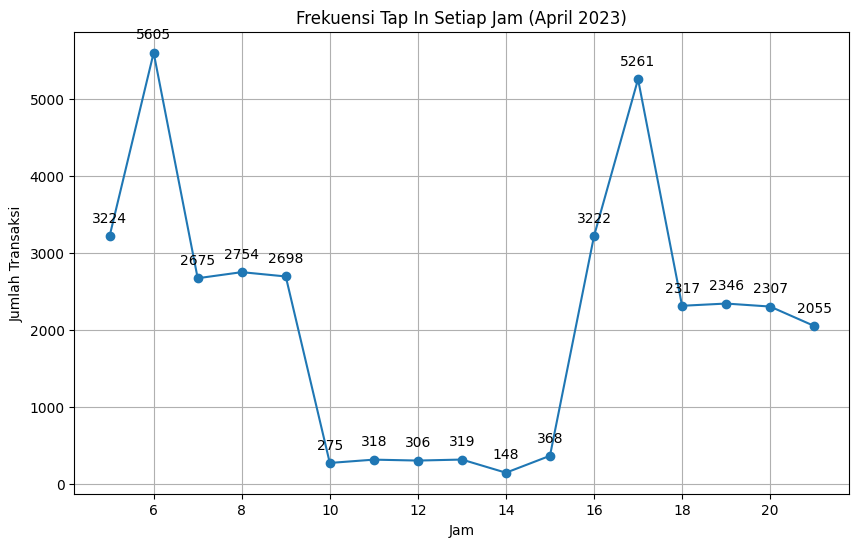

In [64]:
# Ekstrak jam dari kolom 'TapInTime'
df['tapInHour'] = df['tapInTime'].dt.hour

# Filter data untuk satu bulan April 2023 saja
start_date = '2023-04-01'
end_date = '2023-04-30'
df_filtered = df[(df['tapInTime'] >= start_date) & (df['tapInTime'] <= end_date)]

# Hitung frekuensi setiap jam
hourly_counts = df_filtered['tapInHour'].value_counts().sort_index()

# Plot line
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Frekuensi Tap In Setiap Jam (April 2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)

# Menambahkan nilai anotasi pada setiap titik
for i, txt in enumerate(hourly_counts.values):
    plt.annotate(txt, (hourly_counts.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

Jumlah transaksi yang melakukan tap out berdasarkan jam operasional pada April 2023

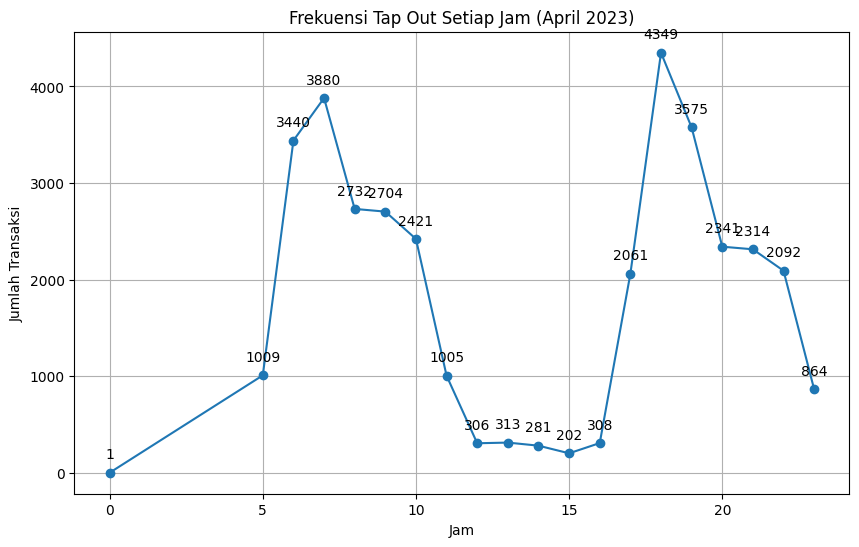

In [65]:
# Ekstrak jam dari kolom 'TapOutTime'
df['tapOutHour'] = df['tapOutTime'].dt.hour

# Filter data untuk satu bulan April 2023 saja
start_date = '2023-04-01'
end_date = '2023-04-30'
df_filtered = df[(df['tapOutTime'] >= start_date) & (df['tapOutTime'] <= end_date)]

# Hitung frekuensi setiap jam
hourly_counts = df_filtered['tapOutHour'].value_counts().sort_index()

# Plot line
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Frekuensi Tap Out Setiap Jam (April 2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)

# Menambahkan nilai anotasi pada setiap titik
for i, txt in enumerate(hourly_counts.values):
    plt.annotate(txt, (hourly_counts.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

**Insight jumlah transaksi yang melakukan tap in dan tap out berdasarkan jam operasional pada April 2023**

- Berdasarkan visualisasi line plot yang terbentuk dari jumlah transaksi yang melakukan aktivitas tap in dan tap out berdasarkan rata-rata jam operasional sepanjang bulan April 2023 menunjukkan kemiripan pola pada aktivitas tap in dengan tap out
- Berdasarkan jumlah transaksi yang terjadi pada aktivitas tap in, maka pada pukul 06.00 AM merupakan rata-rata jam operasional yang memiliki jumlah transaksi terbanyak dengan sejumlah 5605 transaksi sepanjang bulan April 2023. Pendapat yang dapat saya berikan pada analisa ini adalah pada saat jam 06.00 AM merupakan waktu dimana masyarakat melakukan pemberangkatan dengan menggunakan transportasi Transjakarta untuk memulai melakukan aktivitas menuju tempat kerja, khususnya pada saat weekdays.
- Jumlah transaksi yang melakukan tap in pada pukul 17.00 AM merupakan jumlah transaksi terbanyak kedua dengan sejumlah 5261 transaksi sepanjang bulan April 2023. Bertolak belakang pada analisa sebelumnya bahwa pada pukul 16.00 PM merupakan waktu rata-rata setiap masyarakat mengakhiri aktivitas bekerja kemudian diikuti dengan pukul 17.00 PM yang merupakan jam operasional ketika masyarakat cenderung menggunakan transportasi Transjakarta untuk melakukan aktivitas dari tempat kerja untuk pulang menuju rumah masing-masing.
- Pada pukul 10.00 AM hingga 15.00 PM merupakan rentang jam operasional yang memiliki rata-rata jumlah pengguna paling sedikit sepanjang bulan April 2023. Hal tersebut terjadi karena pada rentang jam operasional tersebut masyarakat cenderung masih berada pada tempat kerja masing-masing untuk melakukan aktivitas bekerja sehingga masyarakat juga cenderung tidak terlalu banyak yang menggunakan transportasi Transjakarta
- Pada aktivitas tap out, jumlah transaksi terbanyak  terjadi pada pukul 18.00 PM. Hal tersebut mungkin terjadi walaupun mayoritas masyarakat melakukan pemberangkatan menuju tempat kerja masing-masing dengan Transjakarta pada pukul 06.00 AM namun mungkin setiap pengguna memiliki waktu pulang dari tempat kerja yang berbeda-beda.
- Sedangkan berdasarkan jumlah transaksi yang melakukan transaksi tap out menunjukkan bahwa jumlah transaksi kedua terbanyak terjadi pada saat pukul 07.00 AM dengan sejumlah 3880 transaksi. Hal tersebut dapat saya analisa bahwa mungkin jika pengguna banyak yang melakukan tap in pada saat pukul 06.00 AM sedangkan pada saat aktivitas tap out terjadi jumlah transaksi terbanyak jatuh pada saat satu jam setelahnya, yaitu pada saat pukul 07.00 AM dikarenakan pada saat pukul 07.00 PM pengguna yang sebelumnya banyak melakukan pemberangkatan pada pukul 06.00 PM kemudian baru akan sampai di tempat kerja masing-masing pada saat satu jam setelahnya.
- Jumlah transaksi kedua terbanyak yang melakukan aktivitas tap out terjadi pada pukul 18.00 PM. Hal tersebut mungkin terjadi walaupun mayoritas masyarakat melakukan pemberangkatan menuju tempat kerja masing-masing dengan Transjakarta pada pukul 06.00 AM namun mungkin setiap pengguna memiliki waktu pulang dari tempat kerja yang berbeda-beda.

**Rekomendasi**
- Perusahaan Transjakarta dapat meningkatkan pelayanan pada pukul 06.00 AM dan 17.00 PM karena kedua waktu tersebut merupakan momen dimana banyak masyarakat yang menggunakan Transjakarta baik pada saat melakukan aktivitas tap in maupun tap out. Perusahaan dapat meningkatkan dan menambah kapasitas transportasi pada kedua waktu tersebut agar transportasi Transjakarta dapat lebih banyak menampung masyarakat yang banyak menggunakan Transjakarta pada kedua waktu tersebut.
- Perusahaan Transjakarta dapat meningkatkan promosi serta pelayanan pada jam operasional yang memiliki sepi pengguna, seperti pada rentang jam 09.00 AM hingga 15.00 PM. Promosi tersebut bertujuan agar transportasi Transjakarta tidak terlalu terbebani hanya pada saat jam yang memiliki ramai pengguna, yaitu jam 06.00 AM dan 17.00 PM sehingga dapat menciptakan pemerataan pelayanan pada keseluruhan jam operasional Transjakarta. Salah satu strategi yang dapat dilakukan adalah memberikan diskon biaya transaksi Transjakarta baik pada aktivitas tap in maupun tap out pada rentang jam tersebut.
 

**Jumlah transaksi Transjakarta per harian pada bulan April 2023**
- Analisa jumlah transaksi Transjakarta per harian sepanjang bulan April 2023 bertujuan untuk mengetahui pola dari informasi

Jumlah transaksi yang melakukan tap in per harian sepanjang bulan April 2023

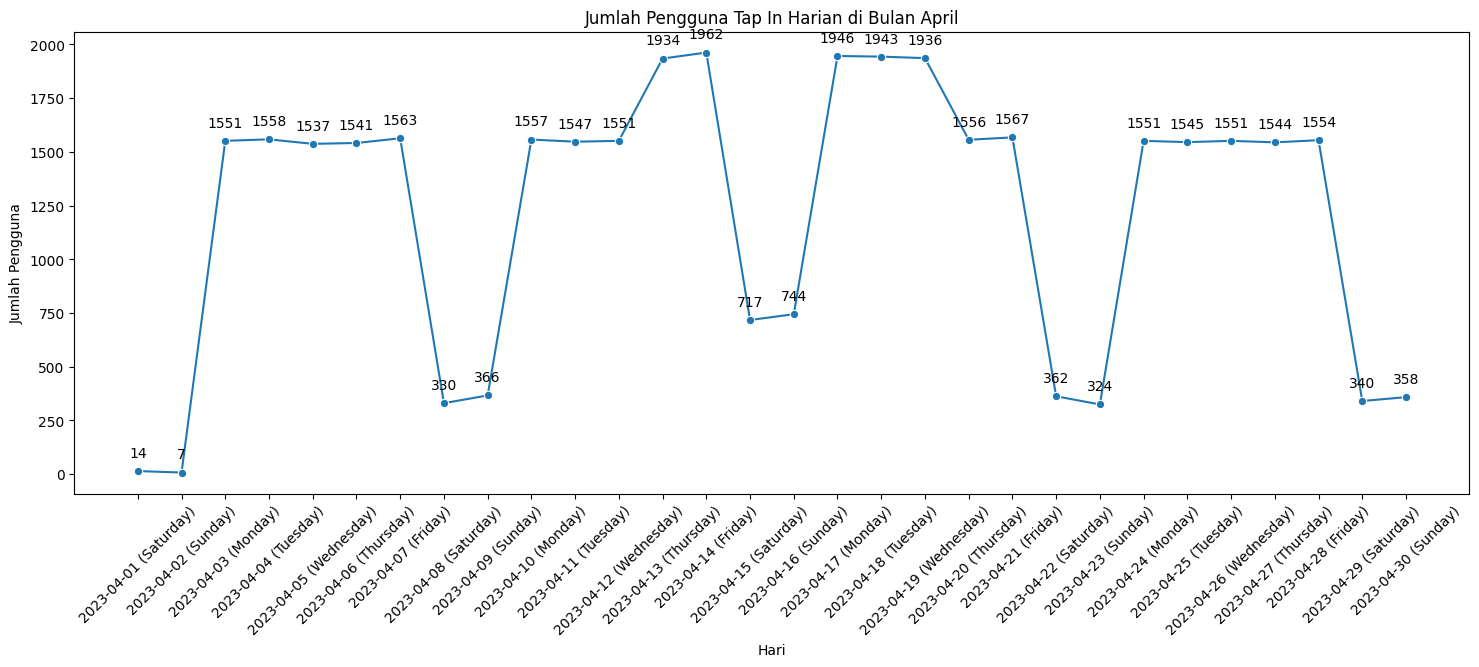

In [66]:
# library
import calendar

# Filter data hanya untuk bulan April
df_april = df[(df['tapInTime'] >= '2023-04-01') & (df['tapInTime'] < '2023-05-01')]

# Buat kolom baru untuk menyimpan informasi harian, termasuk nama hari
df_april['Day'] = df_april['tapInTime'].dt.strftime('%Y-%m-%d')
df_april['Day'] = df_april['tapInTime'].dt.strftime('%Y-%m-%d (%A)')  # Tambahkan nama hari

# Hitung jumlah transaksi per hari
daily_counts = df_april['Day'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')

# Menambahkan anotasi pada setiap titik
for i, value in enumerate(daily_counts.values):
    plt.annotate(str(value), (daily_counts.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Jumlah Pengguna Tap In Harian di Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()





Jumlah transaksi yang melakukan tap out per harian sepanjang bulan April 2023

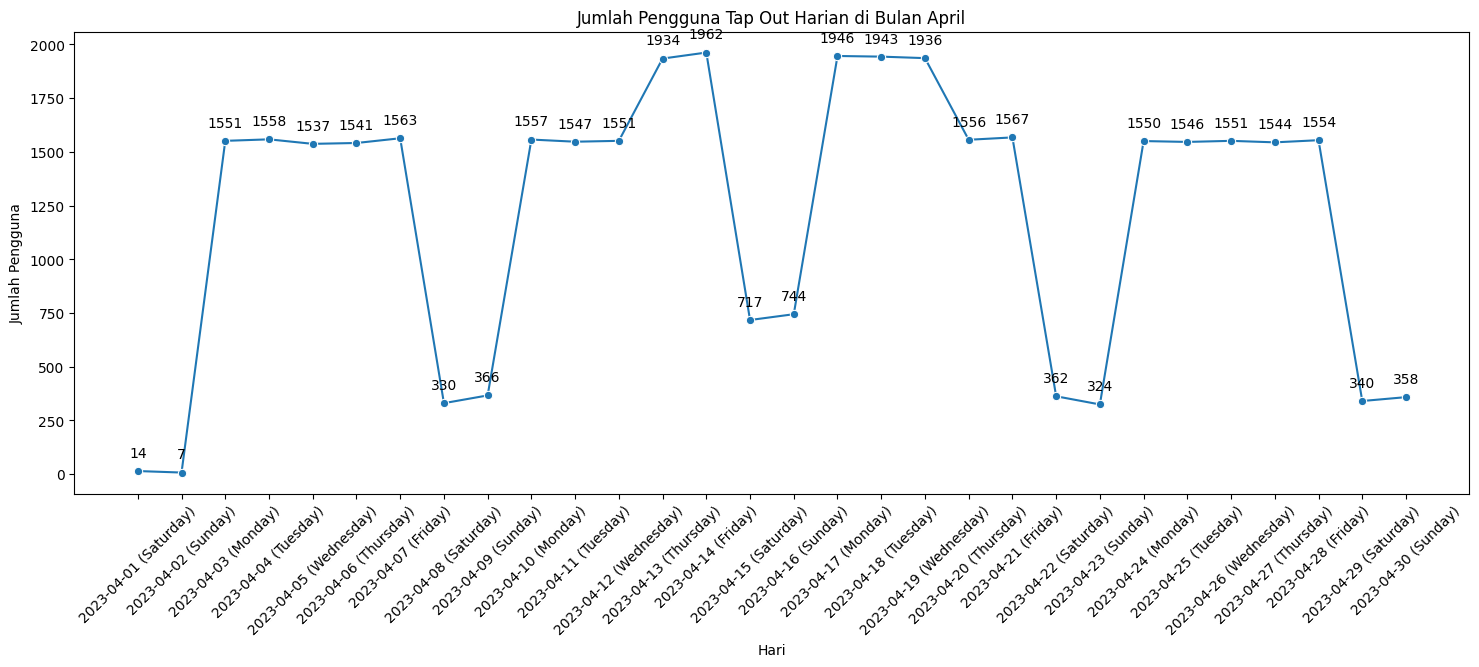

In [67]:
# library
import calendar

# Filter data hanya untuk bulan April
df_april = df[(df['tapOutTime'] >= '2023-04-01') & (df['tapOutTime'] < '2023-05-01')]

# Buat kolom baru untuk menyimpan informasi harian, termasuk nama hari
df_april['TapOut_Day'] = df_april['tapOutTime'].dt.strftime('%Y-%m-%d (%A)')

# Hitung jumlah transaksi tap out per hari
daily_counts = df_april['TapOut_Day'].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(18, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')

# Menambahkan anotasi pada setiap titik
for i, value in enumerate(daily_counts.values):
    plt.annotate(str(value), (daily_counts.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Jumlah Pengguna Tap Out Harian di Bulan April')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()


**Insight jumlah transaksi yang melakukan tap in dan tap out berdasarkan jam operasional pada April 2023**
- Berdasarkan visualisasi line plot yang terbentuk untuk menampilkan jumlah transaksi yang melakukan aktivitas tap in dan tap out per harian sepanjang bulan April 2023 menunjukkan pola serta jumlah transaksi yang sama pada aktivitas tap in dengan tap out. Hal tersebut dapat terjadi dikarenakan dalam satu hari, pengguna yang melakukan aktivitas tap in tentu nya akan melakukan aktivitas tap out juga sehingga data dari pengguna yang melakukan tap in dan tap out terlepas dari jam operasional serta lokasi terminal dari kedua aktivitas tersebut berbeda namun kedua aktivitas tersebut akan dianggap sebagai satu kesatuan dikarenakan pada analisa ini dilihat berdasarkan per masing-masing hari sepanjang April 2023.
- Baik pada aktivitas tap in maupun tap out terjadi sebuah pola yang menunjukkan bahwa setiap pada saat weekend yang meliputi 2 harian dalam setiap minggu yaitu hari Sabtu dan Minggu memiliki jumlah transaksi yang sangat sedikit pada setiap minggu nya dari awal hingga penghujung bulan April 2023. Hal tersebut dapat saya analisa bahwa pada saat weekend, mayoritas masyarakat tidak melakukan aktivitas bekerja dan cenderung melakukan aktivitas mandiri di rumah masing-masing sehingga jumlah transaksi setiap weekend cenderung sangat sedikit. Berbeda sebaliknya dengan jumlah transaksi pada saat weekdays atau rentang hari senin sampai jum'at yang menunjukkann jumlah transaksi yang cenderung lebih banyak dibandingkan dengan pada saat weekend dikarenakan pada saat weekdays masyarakat akan menggunakan transportasi Transjakarta untuk melakukan aktivitas pulang dan pergi tempat kerja
- Pada rentang tanggal 12 hingga 13 April 2023 memiliki jumlah transaksi yang cenderung banyak dibandingkan dengan tanggal selain rentang tersebut. Jika dilansir pada berita yang bersumber pada liputan6 dengan link sumber https://www.liputan6.com/news/read/5263970/libur-lebaran-idul-fitri-2023-polda-metro-tiadakan-ganjil-genap-di-jakarta-mulai-19-april-2023?page=2 maka dapat dianalisa bahwa pada rentang tanggal tersebut sedang terjadi arus mudik lebaran sehingga terjadi kepadatan lalu lintas pada daerah Jakarta yang memungkinkan membuat masyarakat memilih untuk menggunakan transportasi Transjakarta guna menghindari arus mudik lebaran pada rentang tanggal tersebut

**Rekomendasi**
- Perusahaan dapat melakukan penyesuaian transportasi setiap akhir pekan. Mengingat bahwa jumlah transaksi Transjakarta pada saat hari Sabtu dan Minggu sangat sedikit dan berbeda signifikan dibandingkan dengan pada saat hari kerja maka salah satu langkah yang dapat dilakukan oleh Perusahaan adalah mengurangi jumlah armada dan frekuensi perjalanan dengan tujuan agar biaya operasional Perusahaan dapat dikurangi pada saat setiap akhir pekan
- Perusahaan dapat memberikan promosi khusus pada saat rentang tanggal 12 hingga 19 April 2023 ketika sedang terjadi arus mudik lebaran. Promosi tersebut dapat berupa pemberian diskon, peningkatan armada, serta lainnya
- Perusahaan dapat memberikan edukasi dan informasi kepada pengguna dengan memberikan rekomendasi lokasi terminal pada saat volume transaksi sedang tinggi maupun rendah pada setiap hari nya. Strategi tersebut bertujuan agar pengguna dapat memiliki referensi mengenai lokasi terminal yang sebaiknya dilalui untuk melakukan perjalanan transportasi pada saat situasi tertentu
- Perusahaan dapat melakukan kolaborasi dengan pihak diluar Transjakarta seperti Pemerintah, Kepolisian, dan pihak terkait lainnya dengan tujuan agar kolaborasi tersebut dapat memberikan informasi mengenai arus jalan yang dapat terjadi kapanpun. Sehingga dengan kolaborasi tersebut, Perusahaan dapat melakukan penyesuaian terhadap layanan transportasi menjelang atau ketika sedang terjadi arus jalan tersebut


**Lokasi terminal yang paling umum dilalui oleh pengguna pada saat tap in dan tap out**

- Analisa lokasi terminal yang paling banyak terjadi transaksi oleh setiap pengguna Transjakarta bertujuan untuk mengetahui pola perilaku pengguna dalam hal terminal yang paling banyak dilalui oleh pengguna berdasarkan aktivitas tap in maupun tap out
- Jumlah terminal akan diambil sejumlah 5 teratas pada setiap aktivitas tap in dan tap out
- 5 terminal teratas tersebut dapat dijadikan referensi bagi Perusahaan untuk melakukan evaluasi serta pengembangan terhadap terminal tersebut

5 terminal dengan jumlah transaksi terbanyak berdasarkan aktivitas tap in

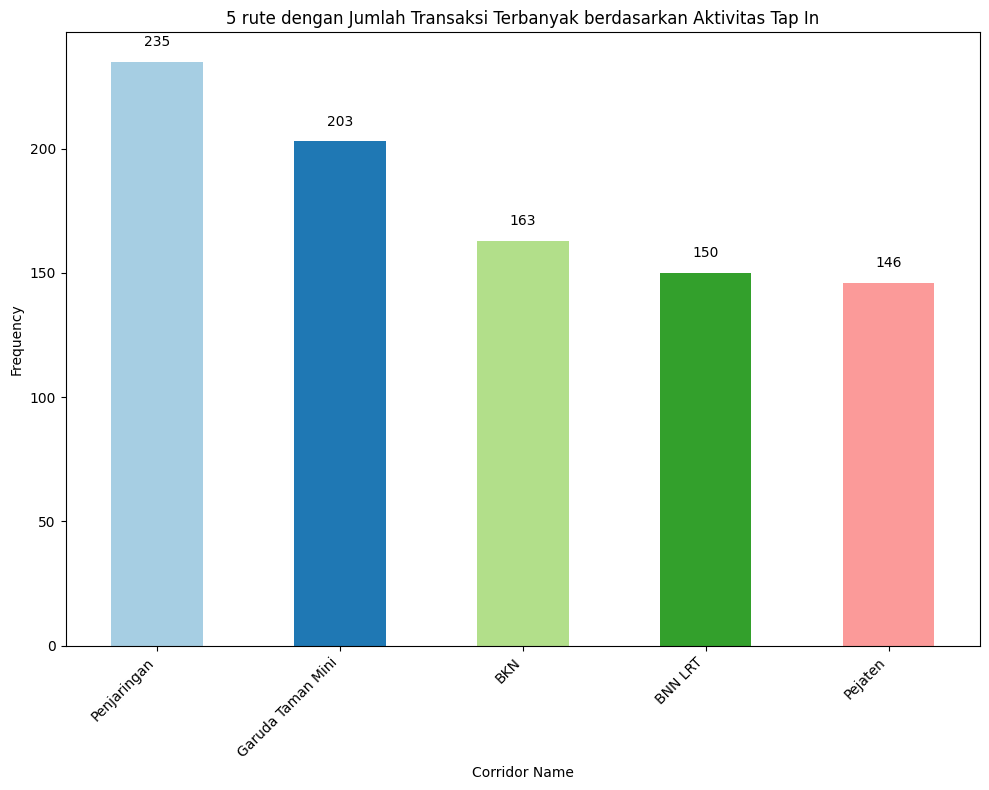

In [68]:
# Menghitung frekuensi transaksi dari variabel tapInStopsName
corridor_freq = df['tapInStopsName'].value_counts()

# Ambil 5 terminal teratas
top_corridors = corridor_freq.head(5)

# Buat bar plot
plt.figure(figsize=(10, 8))
bars = top_corridors.plot(kind='bar', color=plt.cm.Paired(range(len(top_corridors))))

# Anotasi di atas setiap bar
for i, val in enumerate(top_corridors):
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.title('5 rute dengan Jumlah Transaksi Terbanyak berdasarkan Aktivitas Tap In')
plt.xlabel('Corridor Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight 5 terminal dengan jumlah transaksi terbanyak berdasarkan aktivitas tap in**
- Terminal Penjaringan merupakan terminal yang memiliki jumlah transaksi terbanyak berdasarkan aktivitas tap in, yaitu sejumlah 235 transaksi pada terminal tersebut
- Terminal Garuda Taman Mini merupakan terminal yang memiliki jumlah transaksi terbanyak kedua, yaitu sejumlah 203 transaksi
- Sedangkan terminal BKN, BNN LRT, dan Pejaten merupakan terminal yang memiliki jumlah transaksi yang selisihnya mendekati satu sama lain

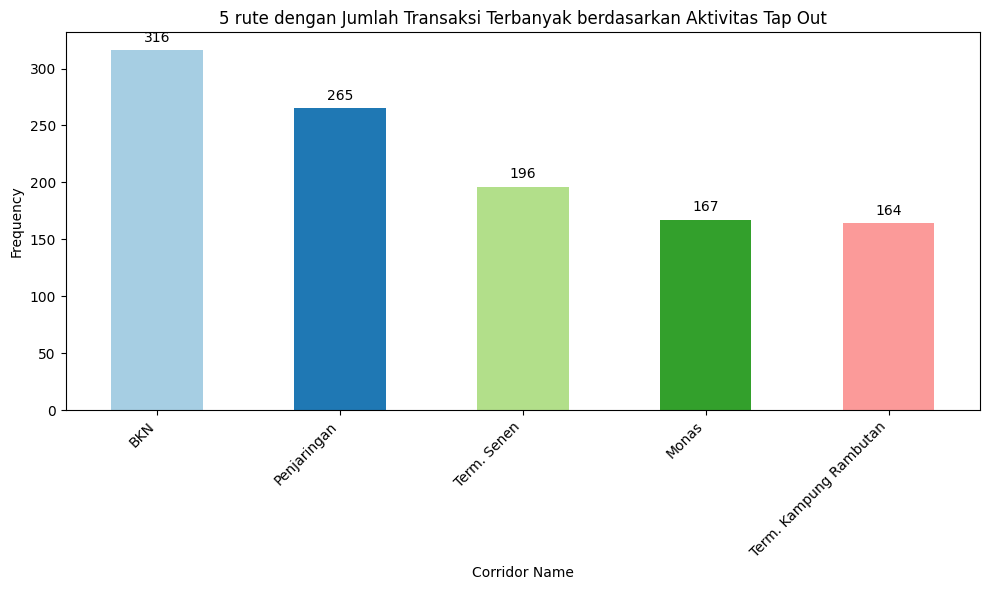

In [69]:
# Menghitung frekuensi transaksi dari variabel tapOutStopsName
corridor_freq = df['tapOutStopsName'].value_counts()

# Ambil 5 terminal teratas
top_corridors = corridor_freq.head(5)

# Buat bar plot
plt.figure(figsize=(10, 6))
bars = top_corridors.plot(kind='bar', color=plt.cm.Paired(range(len(top_corridors))))

# Anotasi di atas setiap bar
for i, val in enumerate(top_corridors):
    plt.text(i, val + 5, str(val), ha='center', va='bottom')

plt.title('5 rute dengan Jumlah Transaksi Terbanyak berdasarkan Aktivitas Tap Out')
plt.xlabel('Corridor Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Insight 5 terminal dengan jumlah transaksi terbanyak berdasarkan aktivitas tap out**
- Terminal BKN merupakan terminal yang memiliki jumlah transaksi terbanyak berdasarkan aktivitas tap out, yaitu sejumlah 316 transaksi pada terminal tersebut
- Terminal Penjaringan  merupakan terminal yang memiliki jumlah transaksi terbanyak kedua, yaitu sejumlah 265 transaksi kemudian diikuti dengan terminal Senen dengan jumlah transaksi 196
- Sedangkan terminal Monas dan Kampung Rambutan merupakan terminal yang memiliki jumlah transaksi yang selisihnya mendekati satu sama lain

**Rekomendasi**
- Perusahaan dapat meningkatkan layanan di Terminal Penjaringan dan BKN karena kedua terminal tersebut merupakan terminal yang menempati urutan nomor satu dengan jumlah transaksi terbanyak pada masing-masing aktivitas tap in dan tap out. Peningkatan layanan tersebut dapat dilakukan dengan menambah jumlah armada dan frekuensi perjalanan dengan tujuan untuk meminimalisir antrian yang panjang pada kedua terminal tersebut
- Perusahaan dapat meningkatkan layanan tambahan pada Terminal Monas, Kampung Rambutan, BNN RLT, dan Pejaten pada setiap aktivitas tap in dan tap out. Semua terminal tersebut merupakan terminal yang memiliki frekuensi transaksi yang sedikit berdasarkan visualisasi plot yang telah dibentuk pada aktivitas tap in dan tap out. Peningkatan layanan tersebut dapat dilakukan dengan pemberian diskon dan lainnya sehingga dapat terjadi pemerataan jumlah transaksi pada setiap terminal dan meminimalisir terjadinya antrian yang panjang pada terminal yang memiliki banyak transaksi. Namun diluar 4 terminal tersebut tentunya masih banyak terminal lain yang memiliki frekuensi transaksi sedikit sehingga pemerataan pelayanan tidak hanya harus dilakukan pada ke 4 terminal tersebut namun sebaiknya juga tetap dilakukan pada seluruh terminal di luar ke 4 terminal tersebut
- Perusahaan dapat menerapkan data untuk melihat frekuensi transaksi pada setiap terminal tersebut secara real time agar Perusahaan dapat memiliki sumber yang riil dan objektif untuk mencanangkan program peningkatan pelayanan pada keseluruhan terminal yang beroperasi.

# **Profil Pengguna Jenis Transaksi setiap Pengguna Transjakarta**

**Jumlah transaksi berdasarkan gender**

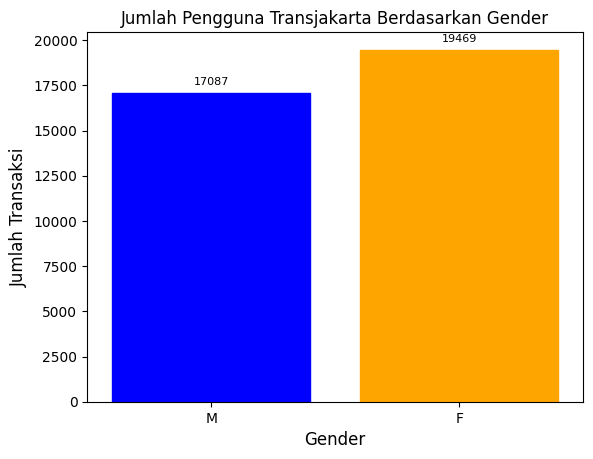

In [71]:
# library
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat visualisasi Barplot jumlah pengguna Transjakarta berdasarkan gender
plots = sns.countplot(data=df, x='payCardSex')

for bar in plots.patches:
    plots.annotate(f'{int(round(bar.get_height()))}',
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

# Mengubah warna setiap bar
colors = ['blue', 'orange']  # Warna untuk female dan male secara berurutan
for i, bar in enumerate(plots.patches):
    bar.set_color(colors[i % len(colors)])

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.title('Jumlah Pengguna Transjakarta Berdasarkan Gender')

plt.show()


**Insight jumlah transaksi berdasarkan gender**
- Pengguna dengan gender yang terdaftar pada kartu transaksi berupa female / perempuan merupakan pengguna yang paling banyak menggunakan transportasi Transjakarta selama bulan April 2023 dengan sejumlah 19469 dibandingkan dengan pengguna pria yang berjumlah 17087

**Jumlah transaksi berdasarkan jenis transaksi pada setiap gender**

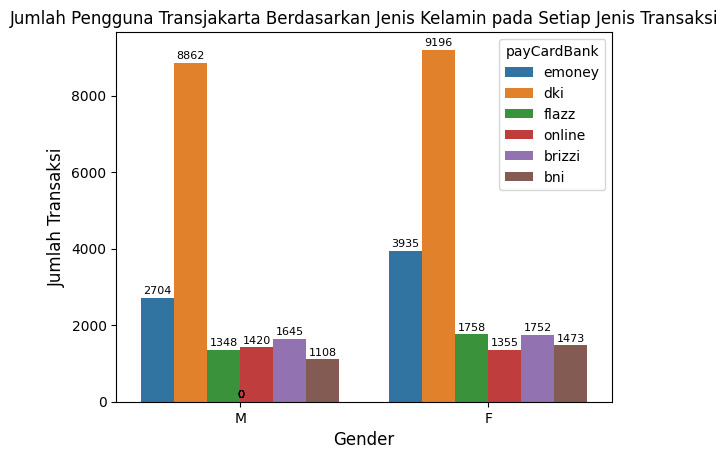

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat visualisasi Barplot jumlah pengguna Transjakarta berdasarkan jenis kelamin pada setiap jenis transaksi
ax = sns.countplot(data=df, x='payCardSex', hue='payCardBank')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.title('Jumlah Pengguna Transjakarta Berdasarkan Jenis Kelamin pada Setiap Jenis Transaksi')

plt.legend(title='payCardBank')
plt.show()


Uji Chi-Square untuk mengetahui apakah terjadi perbedaan yang signifikan antar jenis transaksi flazz, online, brizzi, dan bni

Pernyataan hipotesis
- H0: Tidak terdapat perbedaan yang signifikan antar jenis transaksi
- H1: Terdapat perbedaan yang signifikan antar jenis transaksi

In [73]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['payCardBank'], df['payCardSex'])

# Melakukan uji chi-square
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')

alpha = 0.05
if p < alpha:
    print('Ada bukti yang cukup untuk menolak hipotesis nol, terdapat perbedaan yang signifikan antara frekuensi pengguna Transjakarta berdasarkan jenis bank pada setiap jenis kelamin.')
else:
    print('Tidak cukup bukti untuk menolak hipotesis nol, tidak terdapat perbedaan yang signifikan antara frekuensi pengguna Transjakarta berdasarkan jenis bank pada setiap jenis kelamin.')


Chi-square statistic: 190.6582080954132
P-value: 2.825619765811567e-39
Ada bukti yang cukup untuk menolak hipotesis nol, terdapat perbedaan yang signifikan antara frekuensi pengguna Transjakarta berdasarkan jenis bank pada setiap jenis kelamin.


**Insight jumlah pengguna Transjakarta berdasarkan gender dan jenis transaksi**
- Jenis transaksi dengan menggunakan Bank DKI merupakan jenis transaksi yang paling banyak digunakan untuk melakukan transportasi Transjakarta selama bulan April 2023 baik gender laki-laki maupun perempuan. Terdapat sejumlah 8862 transaksi yang menggunakan Bank DKI pada pengguna dengan gender pria, sedangkan sejumlah 9196 transaksi yang menggunakan Bank DKI pada pengguna yang bergender wanita
- Baik pada gender laki-laki maupun perempuan, jenis transaksi dengan emoney merupakan jenis transaksi kedua terbanyak setelah Bank DKI. Sejumlah 2704 transaksi dengan emoney pada pengguna bergender pria dan 3935 transaksi dengan emoney pada pengguna bergender wanita
- Jenis transaksi dengan menggunakan flazz, online, brizzi, dan bni walaupun secara visualisasi barplot memiliki frekuensi yang tidak jauh berbeda satu sama lain baik pada gender laki-laki maupun perempuan namun berdasarkan uji Chi-Square menginterpretasikan bahwa perbedaan frekuensi antar ketiga jenis transaksi tersebut sangat berbeda secara signifikan satu sama lain

**Rekomendasi**
- Perusahaan dapat memberikan layanan yang ramah Gender. Melihat jumlah transaksi lebih tinggi pada pengguna dengan gender perempuan dibandingkan dengan pengguna gender laki-laki maka Perusahaan dapat mempertimbangkan untuk meningkatkan fasilitas pelayanan pada pengguna dengan gender perempuan. Rekomendasi tersebut dapat berupa pemberian tambahan fasilitas seperti toilet dan ruang tunggu khusus perempuan dengan tujuan untuk memberikan pengalaman yang positif
- Mengingkat Bank DKI merupakan jenis transaksi yang paling banyak digunakan baik oleh pengguna dengan gender perempuan maupun laki-laki maka Perusahaan dapat menciptakan kerjasama dengan Bank DKI. Kerjasama tersebut diharapkan dapat menghasilkan output berupa program promosi serta peningkatan layanan transaksi pada Bank DKI sehingga dapat meningkatkan kenyamanan pada pengguna yang menggunakan jenis transaksi Bank DKI
- Perusahaan dapat juga melakukan kerjasama dengan pihak jenis transaksi selain Bank DKI, terutama pada jenis transaksi dengan emoney, brizzi, bni, dan online. Kerjasama tersebut bertujuan untuk meningkatkan pelayanan pada jenis transaksi selain Bank DKI tersebut agar dapat memenuhi preferensi pengguna yang beragam

# **Analisa Biaya Transportasi Transjakarta**

**Stastistika deskriptif pengeluaran transportasi setiap gender**

In [79]:
# Perbandingan statistik deskriptif antara kelompok pengguna berdasarkan gender
gender_comparison = df.groupby('payCardSex')['payAmount'].describe()

# Menampilkan hasil
print("Perbandingan Statistik Deskriptif Antara Kelompok Pengguna Berdasarkan Gender:")
print(gender_comparison)

Perbandingan Statistik Deskriptif Antara Kelompok Pengguna Berdasarkan Gender:
              count         mean          std  min  25%     50%     75%  \
payCardSex                                                                
F           19469.0  2706.199599  4196.130097  0.0  0.0  3500.0  3500.0   
M           17087.0  2745.508281  4127.951026  0.0  0.0  3500.0  3500.0   

                max  
payCardSex           
F           20000.0  
M           20000.0  


**Insight statistika deskriptif biaya transaksi berdasarkan setiap kelompok gender**
- Rata-rata pengeluaran untuk melakukan transaksi baik pengguna dengan gender perempuan maupun laki-laki memiliki selisih yang sangat berdekatan satu sama lain
- Nilai standar deviasi yang cukup tinggi pada kedua gender menunjukkan bahwa pengeluaran yang dilakukan oleh pengguna dengan gender perempuan maupun laki-laki sangat beragam. Terdapat pengguna yang mengeluarkan lebih maupun kurang dari rata-rata pengeluaran biaya transportasi
- Baik pengguna dengan gender perempuan maupun laki-laki memiliki historis mengeluarkan biaya transportasi sebesar 20000. Biaya tersebut dapat dikategorikan sebagai outlier mengingat rata-rata pengeluarannya adalah sebesar 2706.199599 pada pengguna dengan gender perempuan dan 2745.508281 pada pengguna dengan gender laki-laki

**Rekomendasi**
- Perusahaan dapat menerapkan strategi segmentasi pasar mengingat terdapat perbedaan dalam pola pengeluaran transportasi Transjakarta antara kelompok gender
- Perusahaan dapat melakukan penyesuaian penawaran produk mengingat terdapat perbedaan rata-rata pengeluaran antara kelompok gender. Rekomendasi yang dapat dilakukan adalah dengan mengembangkan promosi atau diskon yang lebih menarik untuk setiap kelompok gender dengan menyesuaikan pada pola pengeluaran mereka
- Keberagaman pengeluaran dari setiap kelompok gender yang dapat terlihat dari nilai variabilitas yang tinggi dapat dijadikan referensi bagi Perusahaan untuk meningkatkan kualitas layanan dan pengalaman pengguna